In [3]:
import librosa
import wave, os, glob
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import librosa.display

%matplotlib inline

# Import Files

In [5]:
x_clean, sr_clean = librosa.load('clean_dataset/p232_001.wav', sr=48000)
x_noisy, sr_noisy = librosa.load('noisy_dataset/p232_001.wav', sr=48000)

In [6]:
x_noise = np.subtract(x_noisy, x_clean)
x_compute = np.subtract(x_noisy, x_noise)

print(type(x_clean))
print(type(x_noisy))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Waveplots

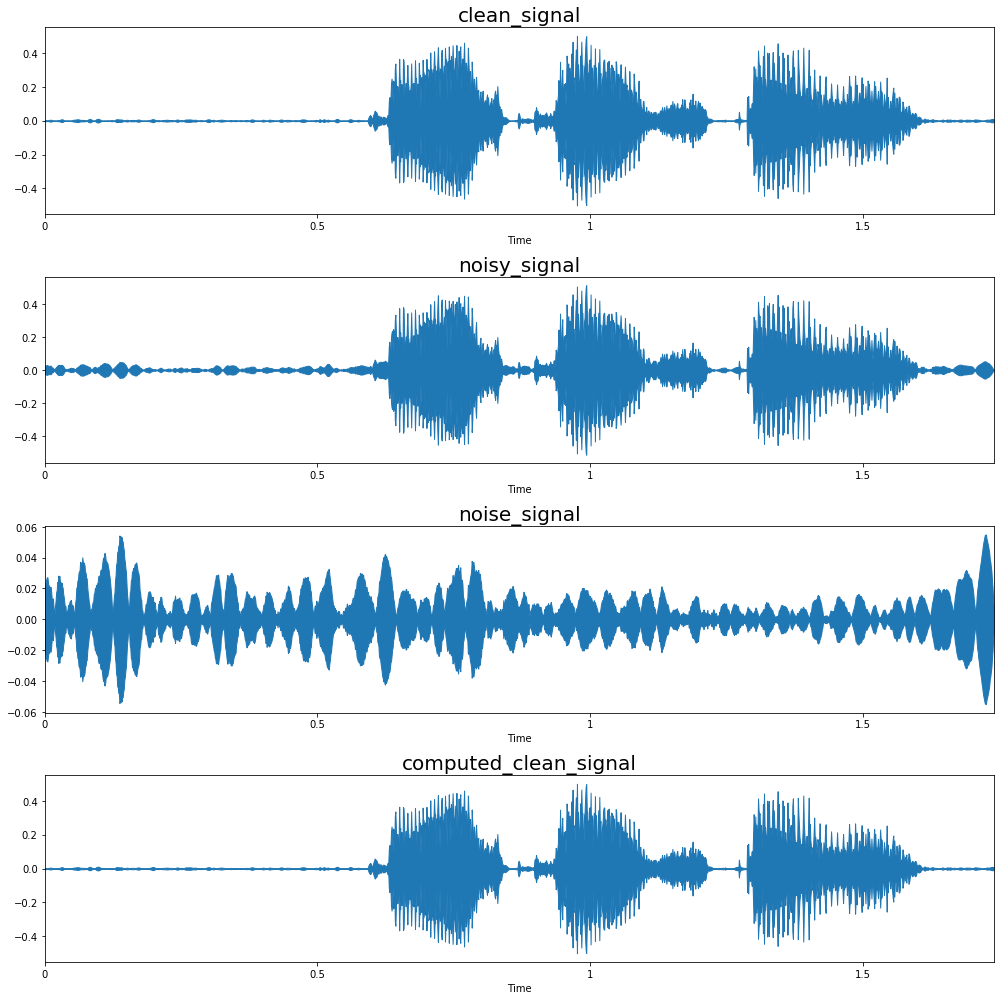

In [20]:
plt.figure(figsize=(14,14))

plt.subplot(4,1,1)
librosa.display.waveplot(x_clean, sr_clean)
plt.title('clean_signal', fontsize=20)


plt.subplot(4,1,2)
librosa.display.waveplot(x_noisy, sr_noisy)
plt.title('noisy_signal', fontsize=20)


plt.subplot(4,1,3)
librosa.display.waveplot(x_noise, sr_noisy)
plt.title('noise_signal', fontsize=20)

plt.subplot(4,1,4)
librosa.display.waveplot(x_compute, sr_noisy)
plt.title('computed_clean_signal', fontsize=20)

plt.tight_layout()

#plt.savefig('waveplots.png');

# Signal plots

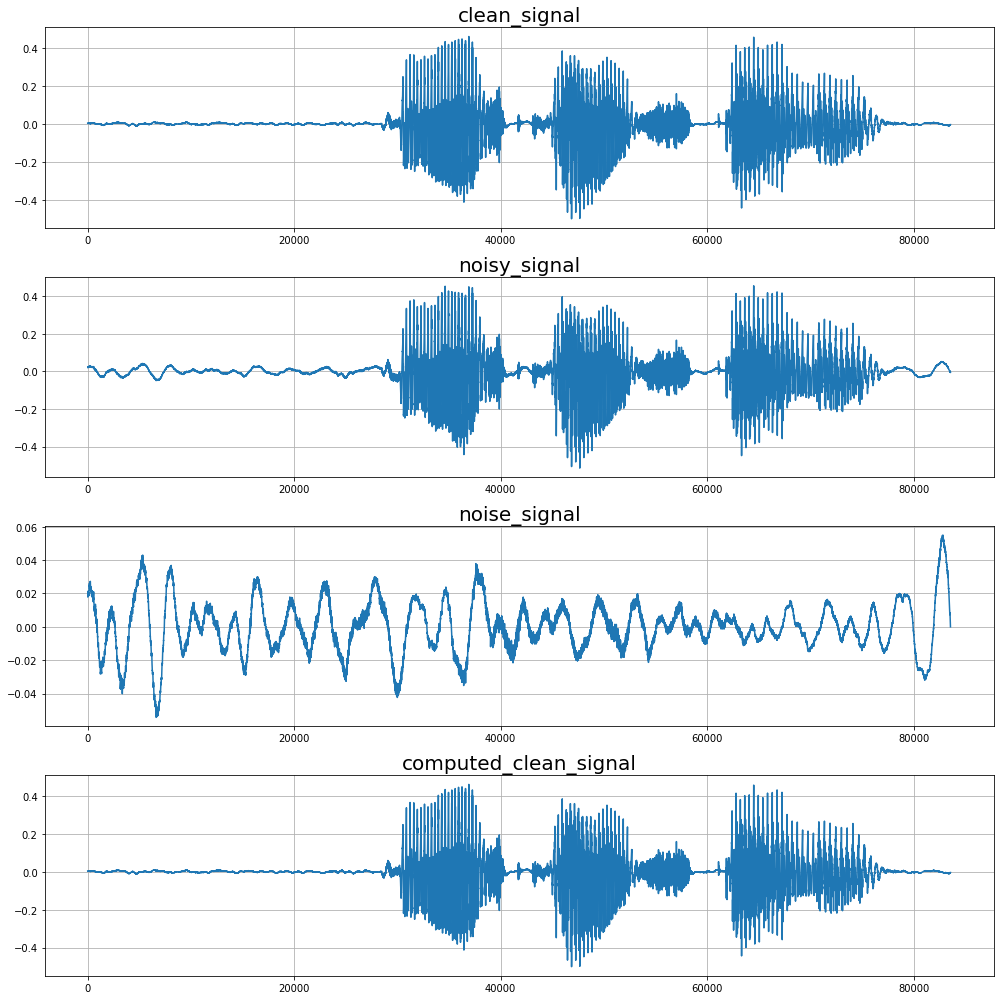

In [26]:
plt.figure(figsize=(14,14))

plt.subplot(4,1,1)
plt.plot(x_clean)
plt.grid()
plt.title('clean_signal', fontsize=20)

plt.subplot(4,1,2)
plt.plot(x_noisy)
plt.grid()
plt.title('noisy_signal', fontsize=20)

plt.subplot(4,1,3)
plt.plot(x_noise)
plt.grid()
plt.title('noise_signal', fontsize=20)

plt.subplot(4,1,4)
plt.plot(x_compute)
plt.grid()
plt.title('computed_clean_signal', fontsize=20)

plt.tight_layout()

#plt.savefig('signal_plots.png');

# Spectrograms

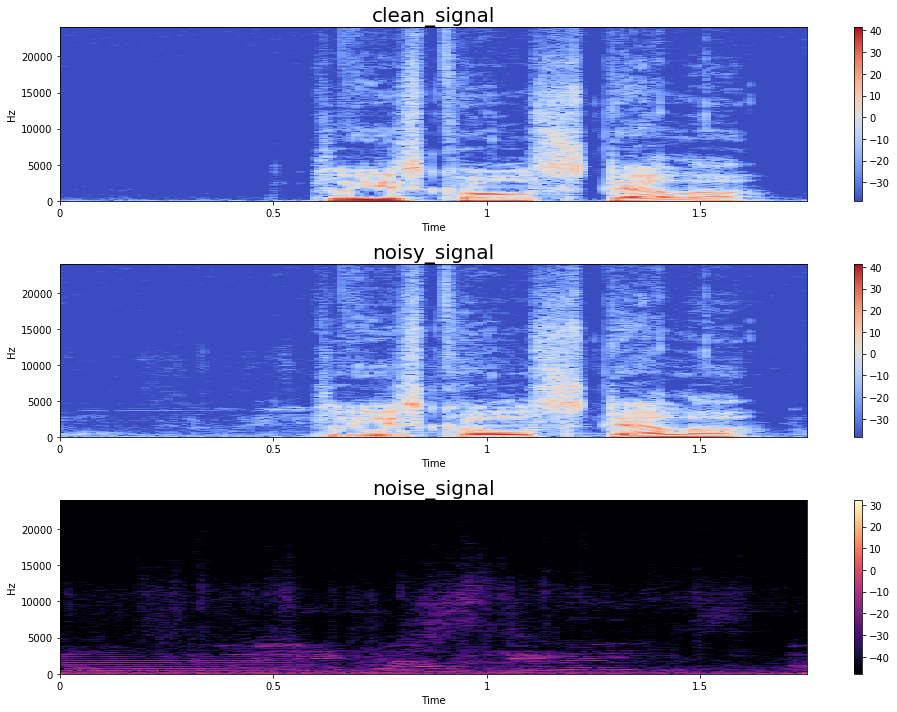

In [34]:
X_clean = librosa.stft(x_clean)
X_clean_db = librosa.amplitude_to_db(abs(X_clean))

X_noisy = librosa.stft(x_noisy)
X_noisy_db = librosa.amplitude_to_db(abs(X_noisy))

X_noise = librosa.stft(x_noise)
X_noise_db = librosa.amplitude_to_db(abs(X_noise))

# X_compute = librosa.stft(x_compute)
# X_compute_db = librosa.amplitude_to_db(abs(X_compute))


plt.figure(figsize=(14,10))

plt.subplot(3,1,1)
librosa.display.specshow(X_clean_db, sr=sr_clean, x_axis='time', y_axis='hz')
plt.title('clean_signal', fontsize=20)
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(X_noisy_db, sr=sr_noisy, x_axis='time', y_axis='hz')
plt.title('noisy_signal', fontsize=20)
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(X_noise_db, sr=sr_noisy, x_axis='time', y_axis='hz')
plt.title('noise_signal', fontsize=20)
plt.colorbar()

# plt.subplot(4,1,4)
# librosa.display.specshow(X_noise_db, sr=sr_noisy, x_axis='time', y_axis='hz')
# plt.title('computed_clean_signal', fontsize=20)
# plt.colorbar()

plt.tight_layout()

#plt.savefig('spectrograms.png');

# Import all Data

In [9]:
def grab_data(path):
    data = []
    for filename in glob.glob(os.path.join(path, '*.wav')):
        x, sr = librosa.load(filename, sr=48000)
        data.append(x)
    return data

In [10]:
clean_data = grab_data('clean_testset_wav')
noisy_data = grab_data('noisy_testset_wav')